## Homework 4

Use this notebook as a starter

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Data:

- https://github.com/gastonstat/CreditScoring
- Also available [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv)

## Preparation 

We'll talk about this dataset in more details in week 6. But for now, use the following code to get started

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv')
df.columns = df.columns.str.lower()

In [3]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


Some of the features are encoded as numbers. Use the following code to de-code them:

In [4]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [5]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


Prepare the numerical variables:

In [6]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

In [7]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,129.571717,5346.428058,341.562963,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,86.784427,11525.170619,1243.532086,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,119.000000,3000.000000,0.000000,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,164.000000,6000.000000,0.000000,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000


Remove clients with unknown default status

In [8]:
df = df[df.status != 'unk'].reset_index(drop=True)

Create the target variable

In [9]:
df['default'] = (df.status == 'default').astype(int)
del df['status']

## Your code

What are the categorical variables? What are the numerical?

In [10]:
df.info()
df.select_dtypes('object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   seniority  4454 non-null   int64 
 1   home       4454 non-null   object
 2   time       4454 non-null   int64 
 3   age        4454 non-null   int64 
 4   marital    4454 non-null   object
 5   records    4454 non-null   object
 6   job        4454 non-null   object
 7   expenses   4454 non-null   int64 
 8   income     4454 non-null   int64 
 9   assets     4454 non-null   int64 
 10  debt       4454 non-null   int64 
 11  amount     4454 non-null   int64 
 12  price      4454 non-null   int64 
 13  default    4454 non-null   int32 
dtypes: int32(1), int64(9), object(4)
memory usage: 469.9+ KB


,home,marital,records,job
0,rent,married,no,freelance
1,rent,widow,no,fixed
2,owner,married,yes,freelance
3,rent,single,no,fixed
4,rent,single,no,fixed
...,...,...,...,...
4449,rent,married,no,fixed
4450,owner,married,no,fixed
4451,owner,married,no,partime
4452,rent,single,no,freelance


In [11]:
df.select_dtypes('integer')

,seniority,time,age,expenses,income,assets,debt,amount,price,default
0,9,60,30,73,129,0,0,800,846,0
1,17,60,58,48,131,0,0,1000,1658,0
2,10,36,46,90,200,3000,0,2000,2985,1
3,0,60,24,63,182,2500,0,900,1325,0
4,0,36,26,46,107,0,0,310,910,0
...,...,...,...,...,...,...,...,...,...,...
4449,1,60,39,69,92,0,0,900,1020,1
4450,22,60,46,60,75,3000,600,950,1263,0
4451,0,24,37,60,90,3500,0,500,963,1
4452,0,48,23,49,140,0,0,550,550,0


Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` funciton for that with `random_state=1`

In [12]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

print(len(df_train), len(df_val), len(df_test))

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.default.values
y_val = df_val.default.values
y_test = df_test.default.values

del df_train['default']
del df_val['default']
del df_test['default']

2672 891 891


## Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the "default" variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenses']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [13]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train,df_train['seniority'])

0.2906221375508058

In [14]:
roc_auc_score(y_train,df_train['time'])

0.5608662489595051

In [15]:
roc_auc_score(y_train,df_train['income'])

0.31799333386736695

In [16]:
roc_auc_score(y_train,df_train['debt'])

0.49521703242164505

Which numerical variable (among the following 4) has the highest AUC?

- seniority
- time
- income
- debt

## Training the model

From now on, use these columns only:

```
['seniority', 'income', 'assets', 'records', 'job', 'home']
```

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

In [17]:
df.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price,default
0,9,rent,60,30,married,no,freelance,73,129,0,0,800,846,0
1,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658,0
2,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985,1
3,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325,0
4,0,rent,36,26,single,no,fixed,46,107,0,0,310,910,0


In [18]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

df = df.loc[:,['seniority', 'income', 'assets', 'records', 'job', 'home','default']]

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

print(len(df_train), len(df_val), len(df_test))

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.default.values
y_val = df_val.default.values
y_test = df_test.default.values

del df_train['default']
del df_val['default']
del df_test['default']

dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts)
model = LogisticRegression(solver = 'liblinear',C=1.0, max_iter=1000)
model.fit(X_train, y_train)

2672 891 891


LogisticRegression(max_iter=1000, solver='liblinear')

## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.512
- 0.612
- 0.712
- 0.812

In [19]:
from sklearn.metrics import roc_auc_score
X_val = dv.fit_transform(df_val.to_dict(orient='records'))

print(round(roc_auc_score(y_val, model.predict_proba(X_val)[:,1]),3))

0.811


## Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

In [20]:
from sklearn.metrics import precision_score, recall_score

thresholds = np.linspace(0, 1, 101)

precision = []
recall = []

y_pred = model.predict_proba(X_val)[:,1]

for t in thresholds:
    p_score = precision_score(y_val, y_pred >= t)
    r_score = recall_score(y_val, y_pred >= t)
    print('%.2f %.3f %.3f' % (t, p_score, r_score))
    precision.append(p_score)
    recall.append(r_score)  

0.00 0.276 1.000
0.01 0.279 1.000
0.02 0.286 0.992
0.03 0.291 0.984
0.04 0.301 0.984
0.05 0.305 0.972
0.06 0.313 0.972
0.07 0.321 0.972
0.08 0.330 0.963
0.09 0.340 0.963
0.10 0.346 0.955
0.11 0.353 0.947
0.12 0.363 0.935
0.13 0.377 0.931
0.14 0.386 0.931
0.15 0.395 0.923
0.16 0.409 0.911
0.17 0.415 0.894
0.18 0.424 0.890
0.19 0.433 0.890
0.20 0.437 0.878
0.21 0.443 0.862
0.22 0.459 0.858
0.23 0.470 0.850
0.24 0.475 0.846
0.25 0.480 0.825
0.26 0.494 0.821
0.27 0.501 0.809
0.28 0.503 0.793
0.29 0.515 0.764
0.30 0.521 0.760
0.31 0.533 0.752
0.32 0.541 0.744
0.33 0.545 0.732
0.34 0.545 0.707
0.35 0.562 0.699
0.36 0.567 0.687
0.37 0.568 0.663
0.38 0.569 0.638
0.39 0.583 0.626
0.40 0.578 0.602
0.41 0.592 0.577
0.42 0.598 0.557
0.43 0.597 0.537
0.44 0.608 0.516
0.45 0.610 0.508
0.46 0.614 0.504
0.47 0.619 0.488
0.48 0.626 0.484
0.49 0.630 0.472
0.50 0.636 0.455
0.51 0.639 0.439
0.52 0.640 0.427
0.53 0.648 0.419
0.54 0.671 0.407
0.55 0.669 0.394
0.56 0.664 0.378
0.57 0.674 0.378
0.58 0.664 0.3

C:\Users\Kenne\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kenne\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kenne\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kenne\AppData\Roaming\Python\Python38\site-packages\skl

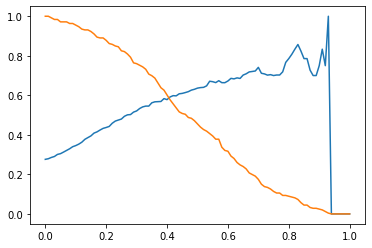

In [21]:
plt.plot(thresholds, precision)
plt.plot(thresholds, recall)

At which threshold precision and recall curves intersect?

* 0.2
* 0.4
* 0.6
* 0.8

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

In [22]:
from sklearn.metrics import precision_score, recall_score

thresholds = np.linspace(0, 1, 101)

precision = []
recall = []
f1 = []

y_pred = model.predict_proba(X_val)[:,1]

for t in thresholds:
    p_score = precision_score(y_val, y_pred >= t)
    r_score = recall_score(y_val, y_pred >= t)
    f1_score = 2*(p_score*r_score)/(p_score+r_score)
    print('%.2f %.3f %.3f %.3f' % (t, p_score, r_score, f1_score))
    precision.append(p_score)
    recall.append(r_score)
    f1.append(f1_score)

0.00 0.276 1.000 0.433
0.01 0.279 1.000 0.437
0.02 0.286 0.992 0.444
0.03 0.291 0.984 0.449
0.04 0.301 0.984 0.461
0.05 0.305 0.972 0.464
0.06 0.313 0.972 0.473
0.07 0.321 0.972 0.483
0.08 0.330 0.963 0.491
0.09 0.340 0.963 0.503
0.10 0.346 0.955 0.508
0.11 0.353 0.947 0.514
0.12 0.363 0.935 0.523
0.13 0.377 0.931 0.537
0.14 0.386 0.931 0.546
0.15 0.395 0.923 0.553
0.16 0.409 0.911 0.564
0.17 0.415 0.894 0.567
0.18 0.424 0.890 0.575
0.19 0.433 0.890 0.582
0.20 0.437 0.878 0.584
0.21 0.443 0.862 0.585
0.22 0.459 0.858 0.598
0.23 0.470 0.850 0.605
0.24 0.475 0.846 0.608
0.25 0.480 0.825 0.607
0.26 0.494 0.821 0.617
0.27 0.501 0.809 0.619
0.28 0.503 0.793 0.615
0.29 0.515 0.764 0.615
0.30 0.521 0.760 0.618
0.31 0.533 0.752 0.624
0.32 0.541 0.744 0.627
0.33 0.545 0.732 0.625
0.34 0.545 0.707 0.616
0.35 0.562 0.699 0.623
0.36 0.567 0.687 0.621
0.37 0.568 0.663 0.612
0.38 0.569 0.638 0.602
0.39 0.583 0.626 0.604
0.40 0.578 0.602 0.590
0.41 0.592 0.577 0.584
0.42 0.598 0.557 0.577
0.43 0.597 

C:\Users\Kenne\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-22-104211008770>:14: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = 2*(p_score*r_score)/(p_score+r_score)
C:\Users\Kenne\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-22-104211008770>:14: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = 2*(p_score*r_score)/(p_score+r_score)
C:\Users\Kenne\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_clas

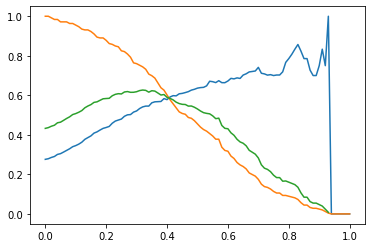

In [23]:
plt.plot(thresholds, precision)
plt.plot(thresholds, recall)
plt.plot(thresholds, f1)

# See max F1 at .3

At which threshold F1 is maximal?

- 0.1
- 0.3
- 0.5
- 0.7

## Question 5


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation


In [24]:
from tqdm.auto import tqdm
from sklearn.model_selection import KFold

def train(df_train, y_train, C=1.0):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver = 'liblinear',C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

def predict(df, dv, model):
    dicts = df.to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

n_splits = 5

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.default.values
    y_val = df_val.default.values

    dv, model = train(df_train.drop('default',axis = 1), y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

    print('C=%s %.3f +- %.4f' % (1.0, np.mean(scores), np.std(scores)))

C=1.0 0.826 +- 0.0000
C=1.0 0.826 +- 0.0001
C=1.0 0.813 +- 0.0171
C=1.0 0.816 +- 0.0156
C=1.0 0.814 +- 0.0146


How large is standard devidation of the scores across different folds?

- 0.001
- 0.014
- 0.09
- 0.14

## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: `[0.01, 0.1, 1, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

In [25]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.default.values
        y_val = df_val.default.values

        dv, model = train(df_train.drop('default',axis=1), y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.767 +- 0.007
C=0.01 0.809 +- 0.013
C=0.1 0.813 +- 0.014
C=0.5 0.814 +- 0.015
C=1 0.814 +- 0.015
C=5 0.814 +- 0.015
C=10 0.814 +- 0.014


Which C leads to the best mean score?

- 0.01
- 0.1
- 1
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

 It is C=10

## Submit the results

Submit your results here: https://forms.gle/e497sR5iB36mM9Cs5

It's possible that your answers won't match exactly. If it's the case, select the closest one.

## Deadline

The deadline for submitting is 04 October 2021, 17:00 CET. After that, the form will be closed.